# Configuration Management and the Cloud

## Week 1

### Course Introduction

> Basic configuration management concepts using Puppet

> In this course, we'll look into how we can apply automation to manage fleets of computers. We'll learn how to automate deploying new computers, keep those machines updated, manage large-scale changes, and a lot more. We'll discuss managing both physical machines running in our offices and virtual machines running in the Cloud.

> If something breaks, give yourself a break :)

**Configuration Management**:
    
        An automation technique which let's us manage the configuration of computers at scale
        
### Introduction to Automation at Scale

**Scale**:

    Being able to scale what we do means that we can keep achieving larger impacts with the same 
    amount of effort.
    A scalable system is a flexible one.
    
**Automation**:

    An essential tool used for keeping up with the infrastructure needs of a growing bussiness.
    
**Configuration management** handles all the configuration of all the nodes by defining a set of rules to the nodes you want to manage and then have a process that assures that those settings are true for each of the nodes.

**Infrastructure as code (IaC)**:

    When all the configuration necessary to deploy and manage a node in the infrastructure is stored 
    in version control.
    Using a version control system to deploy and manage node configurations.
    
Manging your infrastructure as code means that your fleet of nodes are:
* consistent
* versioned
* reliable
* repeatable

### Introduction to Puppet

Puppet is the current industry standard for managing the configuration of computers in a fleet of machines.

We typically deploy puppet using a client-server architecture:
* the client: Puppet agent
* the service: Puppet master
    
    When using this model, the agent connects to the master and sends a bunch of ```facts``` that describe the computer to the master.
    The master then processes this information, generates the list of ```rules``` that need to be applied to the device, and sends a list back to the agent.
    The agent is then in charge of making any necessary changes to the computer
    

```Resources```:
    
        The basic unit of modelling the configuration that we want to manage
        Each resource specifies one configuration that we're trying to manage, like a service, a package, or a             file.

The puppet agent then turns the desired state into reality using providers.
Puppet assigns providers based on the resource type and data collected from the system.

#### Puppet Class Code

The basic resources are:
* package
* file
* service

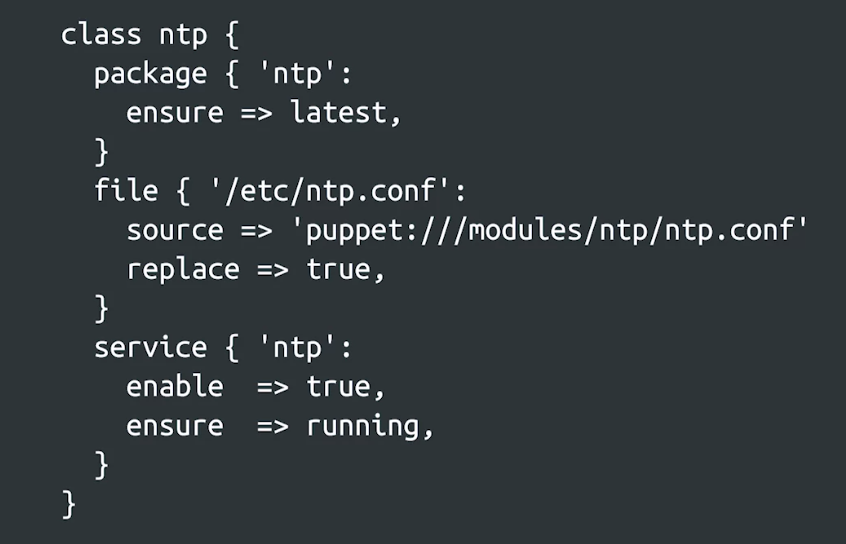

**Puppet Basic Syntax**:

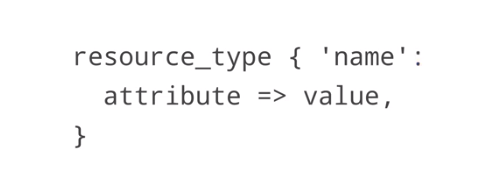

**Puppet Resources**:
* https://puppet.com/docs/puppet/latest/lang_resources.html
* https://puppet.com/blog/deploy-packages-across-your-windows-estate-with-bolt-and-chocolatey/

### The Building Blocks of Configuration Management

#### What are domain specific languages?

Resources are the building blocks of Puppet rules, but we can do much more complex operations using Puppet's domain specific language or DSL.

Domain Specific Language(DSL):

    A programming language that's more limited in scope.
    
Puppet Facts:

    Variables that represent the characteristics of the system.
    A fact is a hash that stores information about the details of a particular system.

#### Puppet variables and conditionals

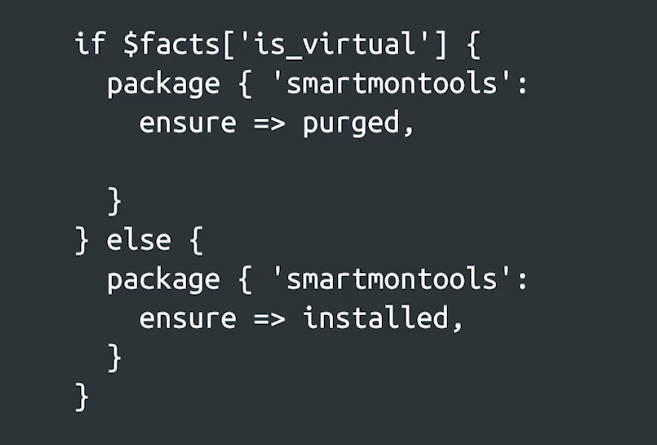

    When the Puppet agent runs, it calls a program called factor which analyzes the current system, storing the 
    information it gathers in these facts. Once it's done, it sends the values for these facts to the server, 
    which uses them to calculate the rules that should be applied. 
    
* All Puppet variables start with $.

An **idempotent** action can be performed over and over again without changing the system after the first time the action was performed, and with no unintended side effects.

#### The driving principle of configuration management: https://www.coursera.org/learn/configuration-management-cloud/lecture/A3ZZB/the-driving-principles-of-configuration-management

Q1: What does it mean that Puppet is stateless?
* Stateless means there is no record of previous interactions, and each interaction request has to be handled based entirely on information that comes with it. 

Q2:What does the "test and repair" paradigm mean in practice?
* By checking to see if a resource requires modification first, we can avoid wasting precious time.

It then sets the "mode" of the file to "0646". This number represents the permissions the file will have.


* You might remember that every file and directory on a Linux system is assigned permissions for three groups of people: the owner, the group and the others.. And for each group, the permissions refer to the possibility of reading, writing and executing the file.

* It's common to use numbers to represent the permissions: 4 for read, 2 for write and 1 for execute. The sum of the permissions given to each of the groups is then a part of the final number. For example, a permission of 6 means read and write, a permission of 5 means read and execute, and a permission of 7 means read, write and execute.

* In this example, we are using 4 numbers. The first one represents any special permissions that the file has (no special permissions). The second one is the permissions for the owner, (read and write), and then come the permissions for the group (read), and finally the permissions for the others (read and write)

Puppet first lab: https://googlecoursera.qwiklabs.com/focuses/20261356?parent=lti_session



## Week  2: Deploying Puppet

### Deploying Puppet Locally

```Manifests```:

    Source code files in Puppet are called Manifests and have the .pp extension

A small Manifest that ensures that htop is installed:

The manifest is call tools.pp:
```puppet
package { 'htop':
    ensure => present,
}
```

To execute the command we got this line:

```bash
sudo puppet apply -v tools.pp 
```

Catalog:

    After running all facts from a computer, the server calculates which rules actually need to be applied.
    The catalog is the list of rules that are generated for one specific computer once the server has evaluated 
    all variables, conditionals, and functions.
    
Managing resources relationships:

```puppet

# ntp is for servers but it gives error that I don't know how to debug
class ntp {
    package { 'ntp':
        ensure => latest,
    }
    file { '/etc/ntp.conf':
        source => '/home/user/ntp.conf',
        replace => true,
        require => Package['ntp'],
        notify => Service['ntp'],
    }
    service { 'ntp':
        enable => true,
        ensure => running,
        require => File['/etc/ntp.conf'],
    }
}

# Apply the rules described in the class
include ntp
```
    We write resource types in lowercase when declaring them, but capitalize them when referring to them from 
    another resource's attribute.
    
Module: 

    A collection of manifests and associated data.
    
```bash
# Install puppet apache
sudo apt install puppet-module-puppetlabs-apache
```
For some reason this package is not included in Manjaro pakage manager pacman.

```puppet
# webserver.pp
include ::apache
```

### More Information About Deploying Puppet Locally

Check out the following links for more information:

* https://puppet.com/docs/puppet/latest/style_guide.html

* https://puppet.com/docs/puppetserver/latest/install_from_packages.html

Question 1:
Puppet evaluates all functions, conditionals, and variables for each individual system, and generates a list of rules for that specific system. What are these individual lists of rules called?  catalog

Question 2:
After we install new modules that were made and shared by others, which folder in the module's directory will contain the new functions and facts?  lib

Question 3:
What is contained in the metadata.json file of a Puppet module? additional data about the module

Question 4:
What does Puppet syntax dictate we do when referring to another resource attribute?

### Deploying Puppet to Clients

Node:

    Any system where we can run a Puppet agent
    
In Puppet, what can we use to categorize in order to apply different rules to different systems?
    
    Node definitions and they are stored in a file called site.pp 

### Puppet's Certificate Infrastructure

Read the transcript: https://www.coursera.org/learn/configuration-management-cloud/lecture/tETus/puppets-certificate-infrastructure

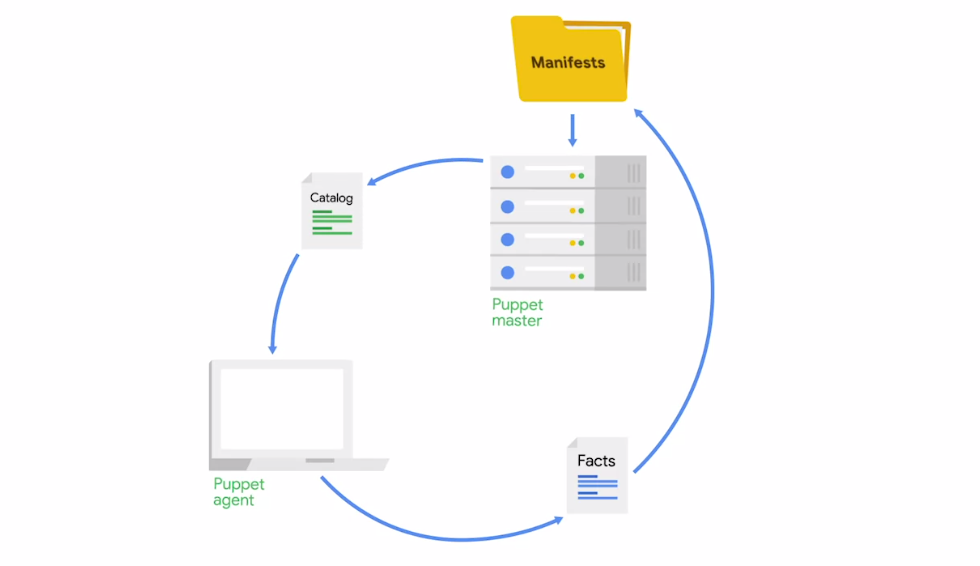

What is the purpose of the Certificate Authority (CA)? The CA either queues a certificate request for manual validation, or uses pre-shared data to verify before sending the certificate to the agent.

### Setting up Puppet Clients and Servers

> Since this is a test deployment to demonstrate Puppet, we'll configure it to automatically sign the certificate requests of the nodes we add. But remember, if we were deploying this to real computers, we'd have to manually sign the requests or implement a proper validating script. We'll do this by calling the Puppet command with the config parameter, and then saying that in this section master we want to set auto sign to true. 

```bash
# Doing a manual run of puppet

# test deployment
sudo puppet config --section master set autosign true
ssh webserver

# install puppet agent 
sudo apt install puppet 

#configure puppet server
sudo puppet config set server ubuntu.example.com

# test the puppet agent
sudo puppet agent -v --test

# node definitions are stored in a file called site.pp
vim  /etc/puppet/code/enviroments/production/manifests/site.pp
```

```puppet
# site.pp file/manifest

node webserver.example.com {
  class {'apache':}
}

node default {}
```

```bash
# retest the puppet agent
sudo puppet agent -v --test


# Doing a automatic run of puppet

# agent gets started whenever the machine reboots
sudo systemctl enable puppet

# tells systemctl to start the puppet service
sudo systemctl start puppet

# check the status to see it is actually running
sudo systemctl status puppet

```

What kind of security encryption is used when the Puppet Certificate Authority validates the identity of a node?

Secure Sockets Layer (SSL).The Certificate Authority creates an SSL key for the agent machine and creates a certificate request.

### More Information about Deploying Puppet to Clients

* http://www.masterzen.fr/2010/11/14/puppet-ssl-explained/

**FQDN**:
                
    Fully Qualified Domain Name, which is the full address for a node
    
**Templates**:

    Templates are documents that combine code, system facts, and text to render a configuration output fitting
    predefined rules.  
    
When defining nodes, how do we identify a specific node that we want to set rules for? By specifying the node's Fully Qualified Domain Names (FQDNs)  

When a Puppet agent evaluates the state of each component in the manifest, it uses gathered facts about the system to decide which rules to apply. What tool can these facts be "plugged into" in order to simplify management of the content of our Puppet configuration files?  Templates  

What is the first thing that happens after a node connects to the Puppet master for the first time? The node requests a certificate.

What type of cryptographic security framework does Puppet use to authenticate individual nodes? Public Key Infrastructure (PKI)

### Updating Deployment

```bash
puppet parser validate # checks that the syntax of the manifest

# to test manifests automatically you can use 
rspec tests

# We can set the facts involved different values and check that the catalog ends up stating what we wanted it to, let's check out an example.
```
### rspec test example

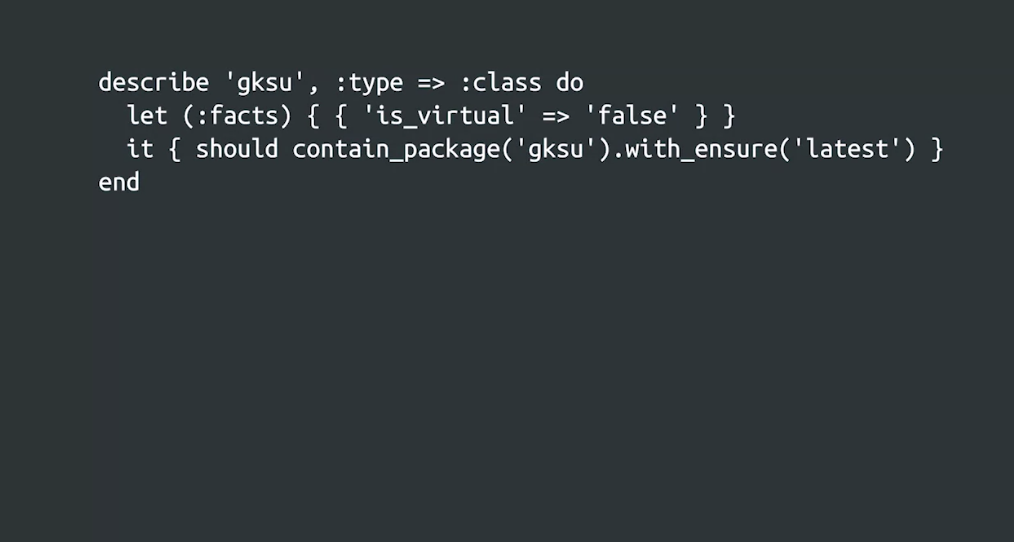

### Safely Rolling out Changes and Validating Them

Production:

    The parts of the infrastructure where a service is executed and served to the users.
    
So how can we roll out changes safely? **The key is to always run them through a test environment first**. 

**Push changes in batches.**

```Canary nodes``` detect issues before the fleet of nodes encounter it.

What is the purpose of using multiple environments? **To fully isolate the configurations that agents see. By creating separate directories for different purposes, such as testing and production, we can ensure changes don't affect end users.**

### More Information About Updating Deployments

* https://rspec-puppet.com/tutorial/

* http://puppet-lint.com/

What do rspec tests do? **Check the manifests for specific content.**

How are canary environments used in testing? **As a test environment to detect problems before they reach the production environment.**

### Puppet Templates

Templates are documents that combine code, data, and literal text to produce a final rendered output. The goal of a template is to manage a complicated piece of text with simple inputs.

In Puppet, you'll usually use templates to manage the content of configuration files (via the content attribute of the file resource type).

Templates are written in a templating language, which is specialized for generating text from data. Puppet supports two templating languages:

* Embedded Puppet (EPP) uses Puppet expressions in special tags. It's easy for any Puppet user to read, but only works with newer Puppet versions. (≥ 4.0, or late 3.x versions with future parser enabled.)
* Embedded Ruby (ERB) uses Ruby code in tags. You need to know a small bit of Ruby to read it, but it works with all Puppet versions.

This lab is really helpful: https://www.coursera.org/learn/configuration-management-cloud/gradedLti/8n7eZ/qwiklabs-assessment-deployment-using-puppet



## Week3: Automation in the Cloud

SaaS(Software as a Service):

    When a Cloud provider delivers an entire application or program to the customer
    
PaaS(Platform as a Service):

    When a Cloud provider offers a preconfigured platform to the costumer
    
IaaS(Infrastructure as a Service):

    When a Cloud provider supplies only the bare-bones computing experience
    
Capacity:

    How much the service can deliver
    
Automatic Scaling:

    The service offered by the Cloud provider will use metrics to automatically increase or decrease the capacity of the system
    
Manual Scaling:

    Changes are controlled by humans instead of software
    
Scaling verticall:

    Make your nodes bigger
    
Scaling horizontally:

    Multiply the number of nodes
    
> We should always use reasonable judgement to protect the machines that we deploy, whether that's on physical servers running on-premise or on virtual machines in the Cloud

What are some advantages to using cloud services? 

* Offload complicated setups to the provider: **Cloud services provide many advantages, such as outsourcing support and maintenance, simplifying configuration management, and letting the provider take care of security.**
* Outsource troubleshooting and maintenance to the provider: **Cloud services provide many advantages, including simplifying configuration management, outsourcing support and maintenance, and letting the provider take care of security.**
* Letting the provider worry about complicated security measures: **Cloud services provide several advantages, like putting the provider in charge of security.**


Containers:

    Applications that are packaged together with their configuration and dependencies
    
What does the phrase lift and shift refer to? **When we migrate from traditional server configurations to the Cloud, we lift the current configuration and shift it to a virtual machine.**

Types of clouds:
* Public clouds : **The cloud service provided to you by a third party.**
* Private clouds : **When your company owns the services and the rest of your infrastructure, whether that's on site or in a remote data center.**
* Hyrid clouds: **A mixture of both private and public clouds.**
* Multi-clouds **A mixture of public and/or private clouds across vendors.**

### Managing Instances in the Cloud

No matter the exact menu entries, when you want to create a VM running in the Cloud, there are a bunch of parameters that you need to set. These parameters are used by the Cloud infrastructure to spin up the machine with the settings that we want.

> As a sysadmin, you may need to decide between costs and processing power to fit the needs of your organization. When setting up instances like these, it's a good idea to start small and scale as needed.

You'll start by choosing:
* the name assigned to the instance: This name will later let you identify the instance if you want to connect to it, modify it, or even delete it.
* the region and zone where the instance is running: You'll generally want to choose a region that's close to your users so that you provide better performance
*  the machine type for your VM: This means selecting how many processing units, or virtual CPUs, and how much memory the virtual machine will be allocated.
* On top of the CPU and memory available, you'll also need to select the ```boot disk``` that the VM will use.

Reference images:

    Store the contents of a machine in a reusable format
    
Templating:

    The process of capturing all of the system configuration to let us create VMs in a repeatable way

Disk image:

    A snapshot of a virtual machine's disk at a given point in time
    
If you have the money this is the google cloud platform website:
* console.cloud.google.com

```bash
curl wttr.in # check the weather

# get a list of the running processes and filter it so 
# we keep only the ones matching a pattern using the grep command
ps ax | grep hello 
```

Remember:

* etc/systemd/system/ is the default systemd directory in many Linux distros, including Red Hat Linux.

How to connect to gcloud from terminal:
```bash

gcloud init

# create web instances
gcloud compute instances create  --source-instance-template webserver-template ws1 ws2 ws3 ws4 ws5

```

### Managing VMs in GCP(Google Cloud Platform)

* https://cloud.google.com/compute/docs/quickstart-linux

* https://cloud.google.com/compute/docs/instances/create-vm-from-instance-template

* https://cloud.google.com/sdk/docs

### Automating Cloud Deployments

Load balancer:

    Ensures that each node receives a balanced number of requests
    
The simplest one is just to give each node one request called ```round robin```.

Autoscaling:

    Allows the service to increase or reduce capacity as needed, while the service owner only pays for the cost of the machines that are in use at any given time
    
#### The architecture of a internet service (without monitoring and alerting):

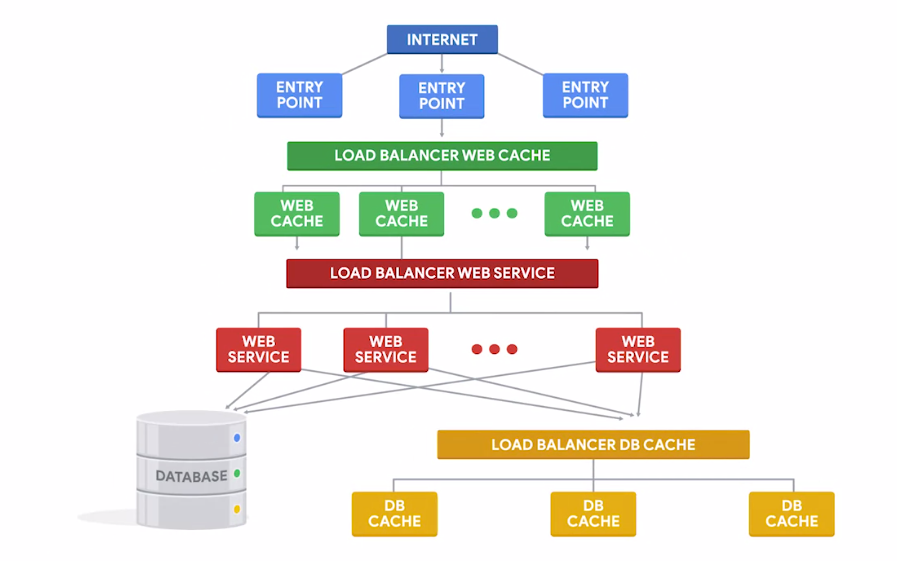

Orchestration:

    The automated configuration and coordination of complex IT systems and services
    
What is the difference between automation and orchestration? **Automation refers to a single task; orchestration arranges tasks to optimize a workflow**

Do you remember what Infrastructure as Code (IaC) is? **Using machine-readable files to automate configuration**

### More About Cloud & GCP
Check out the following links for more information:

* https://cloud.google.com/community/tutorials/getting-started-on-gcp-with-terraform

* Creating groups of unmanaged instances:https://cloud.google.com/compute/docs/instance-groups/creating-groups-of-unmanaged-instances

* Official documentation is here: https://cloud.google.com/load-balancing/docs/https/

* https://geekflare.com/gcp-load-balancer/

Interesting articles about hybrid setups:

* https://blog.inkubate.io/create-a-centos-7-terraform-template-for-vmware-vsphere/

* https://www.terraform.io/docs/enterprise/before-installing/reference-architecture/gcp.html

* https://www.hashicorp.com/resources/terraform-on-premises-hybrid-cloud-wayfair



## Week 4: Storing Data in the Cloud

Persistent Storage:

    Used for instances that are long lived and need to keep data across reboots and upgrades
    

Ephemeral Storage:

    Used for instances that are only temporary and only need to keep local data while they're running
    
Object Storage:

    Lets you place and retrieve objects in a storage bucket

Blobs:

    Binary Large Objects
    
Throughput:

    The amount of data that you can read and write in a given amount of time
    
Input/Output Operations Per Second (IOPS):

    Measure how many reads or writes you can do in one second, no matter how much data you're accessing

Latency:

    The amount of time it takes to complete a read or write operation
    
Hot Data:

    Accessed frequently and stored in hot storage
    
Cold Data:

    Accessed infrequently and stored in cold storage
    
```Sticky sessions```:
    
    all requests from the same client always go to the same backend server 

How do you make sure that clients connect to the servers that are closest to them? **You can use Geo DNS and geoip.**


CDNs ( Content Delivery Networks):

    They make up a network of physical hosts that are geographically located 
    as close to the end user as possible.
    
The load balancing video is good info: https://www.coursera.org/learn/configuration-management-cloud/lecture/EbncU/load-balancing

The ```Round-robin approach``` serves clients one at a time, starting with the first, and making rounds until it reaches the beginning again.

DNS - Domain Name System

### Change management

Environment:

    Everything needed to run the service
    
Production or prod:

    The real enviroment that users interact daily with

A/B testing:

    Some requests are served using one set of code and configuration (A) and other requests are served using a different set of code and configuration (B)
    
> When you have something that you want to test in production with real customers, you can experiment using A/B testing. In A/B testing, some requests are served using one set of code and configuration, A, and other requests are served using a different set of of code and configuration, B. This is another place where a load balancer and instance groups can help us out. You can deploy one instance group in your A configuration and a second instance group in your B configuration. Then by changing the configuration of the load balancer, you can direct different percentages of inbound requests to those two configurations. If your A configuration is today's production configuration and your B configuration is something experimental, you might want to start by only directing 1 % of your requests to B. Then you can slowly ramp up the percentage that you check out whether the B configuration performs better than A, or not. Heads up, make sure you have basic monitoring so that it's easy to tell if A or B is performing better or worse. If it's hard to identify the back-end responsible for serving A requests or B requests, then much of the value of A/B testing is lost to A/B debugging. So what happens if all the precautions we took aren't enough and we break something in production? Remember what we discussed in an earlier course about post-mortems. We learn from failure and we build the new knowledge into our change management.

Can I add a test or a rule to my unit tests, my CI/CD system, or my service health checks to prevent this kind of failure in the future? 

#### How you should test before sending to prod:

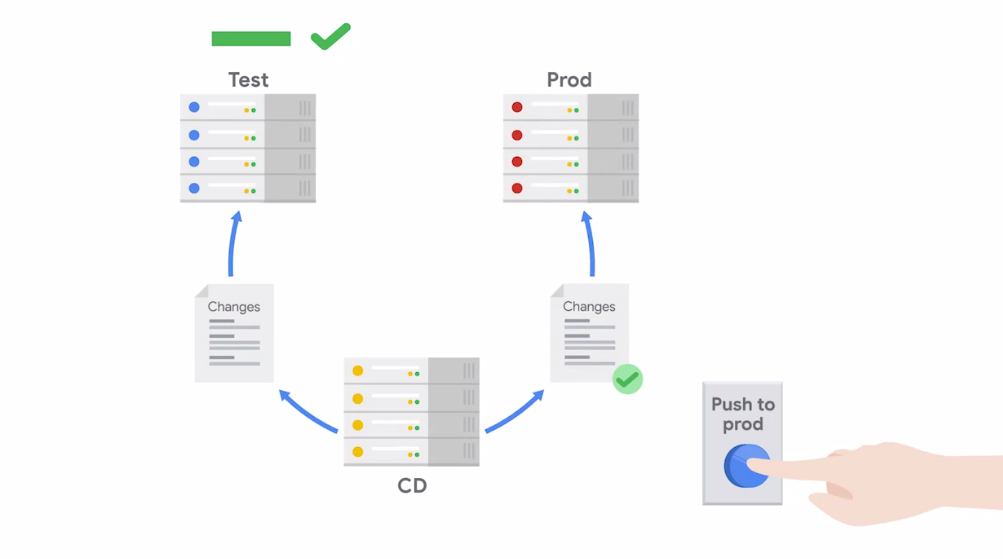

#### How you should make different enviroments before sending the changes to prod:


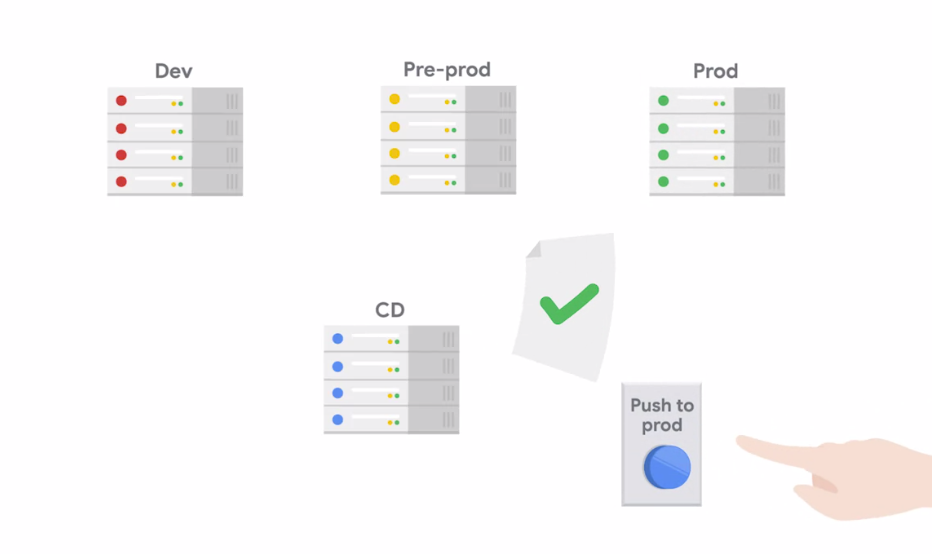

Automation tools are used to manage the software development phase's build and test functions. Which of the following is the set of development practices focusing on these aspects? **Continuous Integration means the software is built, uploaded, and tested constantly.**

### Understanding Limitations

> Personally, I find that when writing software to run on the Cloud, it's important to keep in mind how my application will be deployed. The software I'm creating needs to be fault tolerant and capable of handling unexpected events. Instances might be added or removed from the pool as needed and if an individual machine crashes, my service needs to breeze along without introducing problems

Rate limits:

    Prevent one service from overloading the whole system
    
### More About Cloud Providers

Here are some links to some common Quotas you’ll find in various cloud providers

* https://cloud.google.com/compute/quotas#understanding_vm_cpu_and_ip_address_quotas

* https://docs.aws.amazon.com/general/latest/gr/aws_service_limits.html

* https://docs.microsoft.com/en-us/azure/azure-subscription-service-limits#service-specific-limits


### Monitoring and Alerting

```Monitoring``` lets us look into the history and current status of a system.

> You only want to store the metrics that you carea about, since storing all these metrics in the system takes space, and storage space costs money.

When ```push``` monitoring is used, the service being monitored actively sends metrics to the monitoring system.

Whitebox monitoring:

    Checks the behaviour of the system from the inside.
    
Blackbox monitoring:

    Checks the behaviour of the system from the outside.
    
```cron``` - a tool to schedule a periodic job

> Raising an alert signals that something is broken and a human needs to respond.

Rule of thumb: If an alert isn't actionable it shouldn't be there at all and it's just noise.

What do we call an alert that requires immediate attention? **Page**

Alerts video visualization: https://www.coursera.org/learn/configuration-management-cloud/lecture/UCHxw/getting-alerts-when-things-go-wrong

Service-Level Objectives(SLOs):

    Pre-established performance goals for a specific service
    
If we have an SLO of 99.99%, that gives us an error budget of .01%.

Service-Level Agreement(SLA):

    A commitment between a provider and a client

Manage an infinite loop when monitoring:

Just the terminal commands:
```bash

# Write a bash that creates an infinite loop
# that takes 99% CPU 
while true; do true; done &

# See the script entered and run in in the foreground
fg

# Asses the runing processes
top

# Close the process
Ctrl C # it looks like ^C
```
An Alerting Policy specifies the conditions that trigger alerts, and the actions to be taken when these alerts are triggered, like sending an email address notification. 

### More information on Monitoring and Alerting

Check out the following links for more information:

* https://www.datadoghq.com/blog/monitoring-101-collecting-data/

* https://www.digitalocean.com/community/tutorials/an-introduction-to-metrics-monitoring-and-alerting

* https://en.wikipedia.org/wiki/High_availability

* https://landing.google.com/sre/books/

### Troubleshooting and Debugging

When troubleshooting, what is it called when an error or failure occurs, and the service is downgraded to a previous working version? **Rollback**

Containers:

    Packaged applications that are shipped together with their libraries and dependencies
    
> The key to solving problems in the container world is to make sure you have good logs coming in from all of the parts of the system. And, that you can bring up test instances of each of the applications to try things out when necessary. 
    
> If you operate a service that stores any kind of data, it's critical that you implement automatic backups, and that you periodicaly check that those backups are working correctly by performing restores.

What are some important aspects of disaster recovery?

* Having several forms of redundancy, and failover reduces the impact when failure happens.
* In order to get things up and running as quickly as possible, we need to have a detailed plan.
* Having automatic backups makes it easier to restore and recover.

### Reading: Debugging Problems on the Cloud

Check out the following links for more information:

* https://cloud.google.com/compute/docs/troubleshooting/troubleshooting-instances

* https://docs.microsoft.com/en-us/azure/virtual-machines/troubleshooting/

* https://docs.aws.amazon.com/AWSEC2/latest/UserGuide/ec2-instance-troubleshoot.htm

Question 1
Which of the following are valid strategies for recovery after encountering service failure? (Select all that apply.)

* Switching to a secondary instance.
* Restoring from backup.
* Performing a rollback to a previous version.

Question 2
Which of the following concepts provide redundancy? (Select all that apply.)

* Having a secondary instance of a VM.
* Having a secondary Cloud vendor.

Question 3
If you operate a service that stores any kind of data, what are some critical steps to ensure disaster recovery? (Select all that apply)

* Implement automated backups
* Test backups by restoring

What is the correct term for packaged applications that are shipped with all needed libraries and dependencies, and allows the application to run in isolation?

* Containers

Using a large variety of containerized applications can get complicated and messy. What are some important tips for solving problems when using containers? (Select all that apply)

* Use extensive logging in all parts
* Use test instances

### Last Lab: Debug a problem with a Cloud Deployment and Fix it

Link: https://googlecoursera.qwiklabs.com/focuses/20463556?parent=lti_session

What you'll do
* Understand what http status code means
* Learn how to check port status with the ```netstat``` command
* Learn how to manage services with the ```systemctl``` command
* Know how to monitor system resources and identify the root cause of an issue

HTTP response status codes indicate whether a specific HTTP request has been successfully completed. Responses are grouped into five classes:

* Informational responses (100–199)
* Successful responses (200–299)
* Redirects (300–399)
* Client errors (400–499)
* Server errors (500–599)

The HyperText Transfer Protocol (HTTP) 500 Internal Server Error response code indicates that the server encountered an unexpected condition that prevented it from fulfilling the request. Before troubleshooting the error, you'll need to understand more about systemctl.

```systemctl``` is a utility for controlling the systemd system and service manager. It comes with a long list of options for different functionality, including starting, stopping, restarting, or reloading a daemon.

To find which processes are listening on which ports, we'll be using the ```netstat``` command, which returns network-related information. 

0.0.0.0:80 - this IP uses port 80

How to stop and disable a service in bash (example is called jimmytest.service):

```bash
sudo systemctl stop jimmytest && sudo systemctl disable jimmytest
```

Make sure you reread and go deeper into the learning material.